In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import glob

2023-09-06 21:36:37.426531: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-06 21:36:37.532137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 21:36:38.160915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
data = pd.read_csv("data.csv")

In [4]:
data['Gender'].replace(['male','female'],[0,1],inplace=True)
data['Age'] = data['Age'].replace(['15_22', '23_30'], [0, 1]).astype(int)
data.head(13)

,ID,Age,Gender
0,1.jpeg,1,0
1,2.jpeg,1,0
2,3.jpeg,0,0
3,4.jpeg,0,0
4,5.jpeg,0,0
5,6.jpeg,0,0
6,7.jpeg,0,1
7,8.jpeg,0,1
8,9.jpeg,0,1
9,10.jpeg,0,1


In [5]:
# Define image processing functions
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (150, 150))
    return img

In [6]:
# Prepare image paths and labels
PATH = "./picture"
image_paths = sorted(glob.glob(PATH + "/*.jpeg"))  # Sort image paths
images = tf.stack([load_image(image_path) for image_path in image_paths])
labels = data[['Age', 'Gender']].to_numpy()
print(image_paths)


['./picture/1.jpeg', './picture/10.jpeg', './picture/11.jpeg', './picture/12.jpeg', './picture/13.jpeg', './picture/14.jpeg', './picture/2.jpeg', './picture/3.jpeg', './picture/4.jpeg', './picture/5.jpeg', './picture/6.jpeg', './picture/7.jpeg', './picture/8.jpeg', './picture/9.jpeg']


2023-09-06 21:36:46.043854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-06 21:36:46.109135: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
dataset = tf.data.Dataset.from_tensor_slices((images, labels))

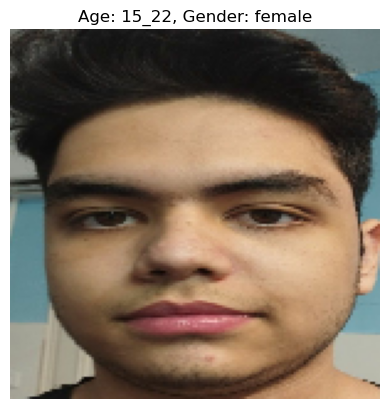

In [9]:
#display image with lables
import matplotlib.pyplot as plt
%matplotlib inline
# Define label names
age_labels = {0: '15_22', 1: '23_30'}
gender_labels = {0: 'male', 1: 'female'}

# Iterate over the dataset and display images with labels
# Iterate over the dataset and display images with labels
image, label = next(iter(dataset.skip(8).take(1)))

age = age_labels[int(label[0])]
gender = gender_labels[int(label[1])]

plt.imshow(image)
plt.title(f"Age: {age}, Gender: {gender}")
plt.axis('off')
plt.show()